<a href="https://colab.research.google.com/github/nclnngzmn/CpE-AIML/blob/main/58034_Lab04_Tyche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 4 Lab 2: Multiple Linear Regression
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

Create a class named `MultipleLinearRegression()` wherein it can compute for the linear regression for multiple variables. The class will be required to have the following helper methods:
> 1. `correlations(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: A vector that contains the covariances of each feature to the target. 
> 3. `train(X, y)`
>> input: 2 Rank 2 matrices
>>
>> output: the weights of the linear regressor. Use least squares method for this part. If the training fails due to the singularity of the matrix, raise a custom error pertaining to autocorrelation.
> 4. `predict(x)`
>> input: A testing vector. *Note*: this function should only accept vectors.
>>
>> output: the predicted value. Note: the procedure in solving for the predicted value should be vectorized. Use the concept of matrix multiplication. Do not forget to pad the matrix for the bias term.
> 5. `evaluate()`
>> input: *none*
>>
>> output: a `DataFrame` that displays the SST, SSR, SST, MSE, RMSE, R-squared, and the Adjusted R-squared. Note: You should use the `predict()` method here.
> 5. `visualize(testX, testY)`
>> input: the dataset training sets and their ground truths.
>>
>> output: a visualization of the linear regressor over the testing dataset. It should be saved as a .jpg file into the running notebook with a dpi of 400.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## No other packages or libraries can be added in this cell

In [ ]:
### YOUR CODE HERE
class MultipleLinearRegression():
  def correlations(self,X,y):
    self.R  =np.corrcoef(X,y,rowvar=False).round(2).reshape(1,9)[0][-4:-2]
    return print(f'R = {self.R}')

  def train(self, X,y):
    X_T = np.c_[np.ones(len(X_train)), X_train]    
    #error = np.linalg.norm(X_T.dot(theta) - y, ord=2)**2
    self.theta = np.linalg.pinv(X_T.T.dot(X_T)).dot(X_T.T).dot(y_train).reshape(3,1)
    self.model_ =(np.array([self.theta[-2],self.theta[-1],self.theta[0]]))

  def predict(self, x):
    self.y_hat = np.array(np.c_[np.ones((len(X_test), 1)), X_test])
    i = np.arange(0,5)
    self.preds = (np.dot(self.y_hat, self.theta)).round(2)
    return self.preds,i

  def evaluate(self):
    y = y_train.values[:,np.newaxis] 
    y_hat = np.arange(5*5).reshape(5,5)
    sst = np.sum(np.square(y)-(np.mean(y)))
    ssr = np.sum(np.square(self.y_hat)-(np.mean(y)))
    mse=np.mean(np.square(y_hat-y[0:5]))
    rsme = (np.sqrt(np.mean(np.sum(np.square(self.y_hat)))))
    r2 = (self.R**2)
    ar2 = (1-((1-r2)*(len(y)-1)/(len(y)-len(X)-1)))
    evaluate = {'SST': sst, 'SSR': ssr,'MSE': mse,'RSME': rsme,
        'R-squared': r2,'Adjusted R-squared': ar2                      
    }  
    df = pd.DataFrame(evaluate)
    return df

  def visualize(self,testX, testY):
    fig, ax = plt.subplots()
    regressor = plt.scatter(y_test, self.preds, color= 'green')
    plt.grid()
    ax.set_xlabel('True Values')
    ax.set_ylabel('Fitted Values')
    ax.set_title('True Value vs. Fitted Values');
    plt.savefig(f'Linear Regressor.jpg', dpi=400)
    return fig,ax, plt.show()

In [ ]:
### Testing Data
### DO NOT DELETE NOR MODIFY THIS CELL
### Data can be retrieved from the git repo
X = pd.read_csv("/content/real_estate_price_size_year.csv") 
y = X['price']
X = X.drop('price', axis=1)
X_train, X_test = X.iloc[0:95], X.iloc[95:]
y_train, y_test = y.iloc[0:95], y.iloc[95:]

In [ ]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = MultipleLinearRegression()

In [ ]:
## TEST #2 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
R = regressor.correlations(X,y)
R

R = [0.09 0.86]


Expected output value:
$$R = \begin{bmatrix}0.09 & 0.86\end{bmatrix}$$

In [ ]:
## TEST #3 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
regressor.model_

array([[ 2.32557432e+02],
       [ 3.01009337e+03],
       [-5.96417478e+06]])

Expected output value:
$$\omega = \begin{bmatrix}\omega_1 \\ \omega_2 \\ \omega_0\end{bmatrix} = \begin{bmatrix}232.56 \\ 3010.09 \\ -5964175.03\end{bmatrix}$$

In [ ]:
## TEST #4 (Max pts: 35)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X_test)
preds

(array([[210962.87],
        [324367.18],
        [424013.31],
        [251928.01],
        [238092.94]]), array([0, 1, 2, 3, 4]))

Expected output value:
$$\hat{y}_i = \begin{bmatrix} 210962.87 \\ 324367.17 \\ 424013.31 \\ 251928.01 \\ 238092.94 \end{bmatrix}, i = \{0,1,2,3,4\}$$

In [ ]:
# TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
model_stats = regressor.evaluate()
model_stats

,SST,SSR,MSE,RSME,R-squared,Adjusted R-squared
0,8.697436e+12,2.035434e+07,1.115619e+11,4974.033802,0.0081,16.539767
1,8.697436e+12,2.035434e+07,1.115619e+11,4974.033802,0.7396,5.079600


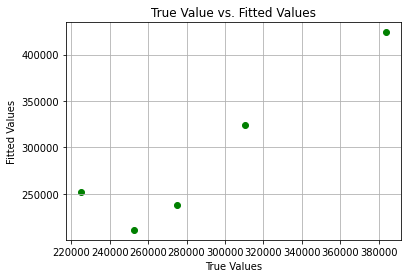

(<Figure size 432x288 with 1 Axes>,
 None)

In [ ]:
## TEST #6 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.visualize(X_test, y_train)